In [69]:
from sklearn.datasets import fetch_openml
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.ensemble import RandomForestClassifier
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np

In [2]:
mnist = fetch_openml('mnist_784', version=1)
mnist.keys()

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

In [3]:
X, y = mnist["data"], mnist["target"]
print(X.shape)
print(y.shape)

(70000, 784)
(70000,)


In [4]:
X = X.to_numpy()
y = y.to_numpy()

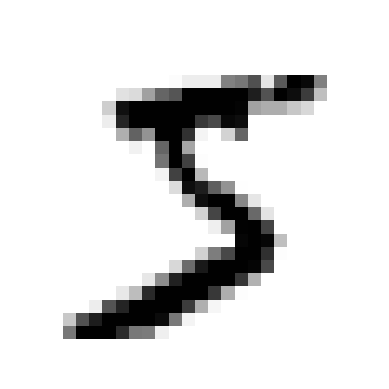

In [5]:
some_digit = X[0]
some_digit_image = some_digit.reshape(28, 28)
plt.imshow(some_digit_image, cmap="binary")
plt.axis("off")
plt.show()

In [6]:
y[0]

'5'

In [7]:
y = y.astype(np.uint8)

In [8]:
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

In [9]:
y_train_3 = (y_train == 3) # True for all 3s, False for all other digits
y_test_3 = (y_test == 3)

In [11]:
sgd_clf = SGDClassifier(random_state=12)
sgd_clf.fit(X_train, y_train_3)

,loss,'hinge'
,penalty,'l2'
,alpha,0.0001
,l1_ratio,0.15
,fit_intercept,True
,max_iter,1000
,tol,0.001
,shuffle,True
,verbose,0
,epsilon,0.1
,n_jobs,None


In [13]:
sgd_clf.predict([some_digit])

array([False])

In [ ]:
cross_val_score(sgd_clf, X_train, y_train_3, cv=3, scoring="accuracy")

array([0.9654 , 0.95975, 0.94735])

In [19]:
y_train_pred = cross_val_predict(sgd_clf, X_train, y_train_3, cv=3)

In [20]:
y_train_pred

array([False, False, False, ..., False, False, False], shape=(60000,))

In [22]:
confusion_matrix(y_train_3, y_train_pred)

array([[52325,  1544],
       [ 1006,  5125]])

In [25]:
precision_score(y_train_3, y_train_pred)

0.7684810316389263

In [26]:
recall_score(y_train_3, y_train_pred)

0.8359158375468928

In [28]:
f1_score(y_train_3, y_train_pred)

0.80078125

In [31]:
y_scores = sgd_clf.decision_function([some_digit])
y_scores

array([-1292.77183317])

In [34]:
threshold = 0
y_some_digit_pred = (y_scores > threshold)
y_some_digit_pred

array([False])

In [35]:
threshold = -5000
y_some_digit_pred = (y_scores > threshold)
y_some_digit_pred

array([ True])

In [36]:
y_scores = cross_val_predict(sgd_clf, X_train, y_train_3, cv=3, method="decision_function")

In [37]:
y_scores

array([ -2425.45861896, -15011.95022065,   -421.27250327, ...,
        -9556.85911959, -15548.68315975, -38140.50555797], shape=(60000,))

In [39]:
precisions, recalls, thresholds = precision_recall_curve(y_train_3, y_scores)

In [41]:
precisions

array([0.10218333, 0.10218504, 0.10218674, ..., 1.        , 1.        ,
       1.        ], shape=(60001,))

In [42]:
recalls

array([1.00000000e+00, 1.00000000e+00, 1.00000000e+00, ...,
       3.26211059e-04, 1.63105529e-04, 0.00000000e+00], shape=(60001,))

In [43]:
thresholds

array([-106918.57745783, -104817.39202905,  -99099.88052816, ...,
         30009.17830272,   30272.52343775,   32280.02629113],
      shape=(60000,))

In [53]:
def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
 plt.plot(thresholds, precisions[:-1], "b--", label="Precision") # Omit last entry in precison and recall arrays
 plt.plot(thresholds, recalls[:-1], "g-", label="Recall")
 plt.grid()
 plt.legend()
 plt.xlabel("Threshold Values")
 plt.title("Precision and Recall for Different Threshold Values")

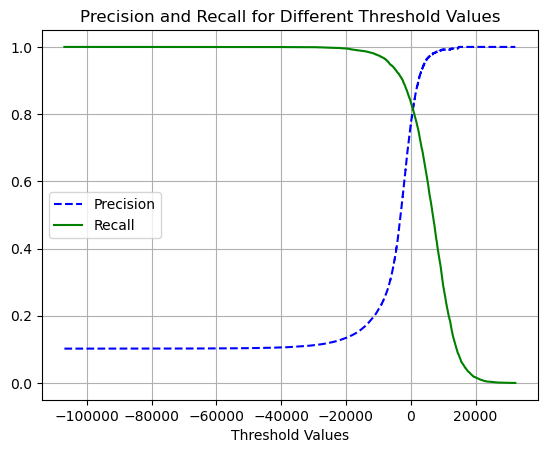

In [54]:
plot_precision_recall_vs_threshold(precisions, recalls, thresholds)
plt.show()

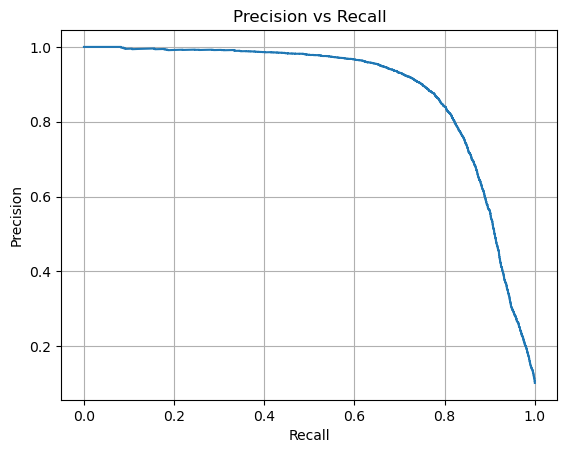

In [52]:
plt.plot(recalls, precisions)
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision vs Recall")
plt.grid()

In [56]:
fpr, tpr, thresholds = roc_curve(y_train_3, y_scores)

In [57]:
fpr

array([0.        , 0.        , 0.        , ..., 0.98444374, 0.98444374,
       1.        ], shape=(3342,))

In [58]:
tpr

array([0.00000000e+00, 1.63105529e-04, 8.23682923e-02, ...,
       9.99836894e-01, 1.00000000e+00, 1.00000000e+00], shape=(3342,))

In [59]:
thresholds

array([             inf,   32280.02629113,   14880.49206119, ...,
        -50453.83014646,  -50469.13411533, -106918.57745783],
      shape=(3342,))

In [103]:
def plot_roc_curve(fpr, tpr, label=None):
 plt.plot(fpr, tpr, 'b--', linewidth=2, label=label)
 plt.plot([0, 1], [0, 1], 'k--') # Dashed diagonal

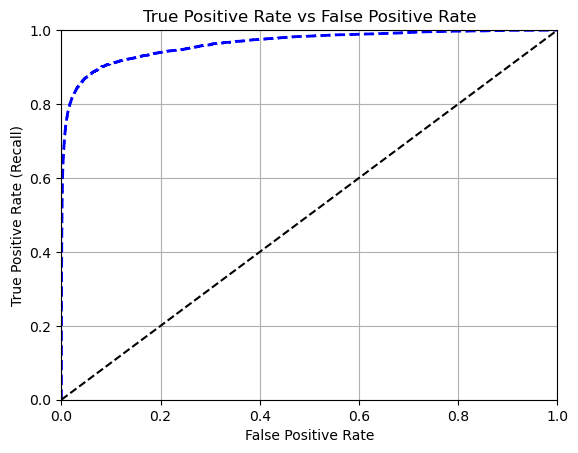

In [104]:
plot_roc_curve(fpr, tpr)
plt.title("True Positive Rate vs False Positive Rate")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate (Recall)")
plt.grid()
plt.xlim(0, 1)
plt.ylim(0, 1)
plt.show()

In [68]:
roc_auc_score(y_train_3, y_scores)

0.9638911172536186

In [72]:
forest_clf = RandomForestClassifier(random_state=12)
y_probas_forest = cross_val_predict(forest_clf, X_train, y_train_3, cv=3, method="predict_proba")

In [ ]:
y_probas_forest # An array where each row represents an instance from the training set, and each column represents a class. Each entry is the probabiblity that the instance belongs to that specific class.

array([[0.62, 0.38],
       [1.  , 0.  ],
       [0.97, 0.03],
       ...,
       [0.89, 0.11],
       [1.  , 0.  ],
       [0.99, 0.01]], shape=(60000, 2))

In [74]:
y_scores_forest = y_probas_forest[:, 1] # We select the positive class's probabiblties since the positive class is of interest (we need to know how confident the model is that a sample belongs to the positive class).
fpr_forest, tpr_forest, thresholds_forest = roc_curve(y_train_3, y_scores_forest)

In [75]:
fpr_forest

array([0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 1.85635523e-05, 1.85635523e-05, 1.85635523e-05,
       1.85635523e-05, 3.71271046e-05, 3.71271046e-05, 3.71271046e-05,
       3.71271046e-05, 5.56906570e-05, 5.56906570e-05, 7.42542093e-05,
       9.28177616e-05, 1.11381314e-04, 1.48508419e-04, 1.85635523e-04,
       1.85635523e-04, 2.41326180e-04, 2.59889732e-04, 3.71271046e-04,
       3.89834599e-04, 4.82652360e-04, 5.94033674e-04, 7.23978541e-04,
       7.98232750e-04, 9.28177616e-04, 1.11381314e-03, 1.26232156e-03,
      

In [76]:
tpr_forest

array([0.        , 0.0471375 , 0.08954494, 0.12738542, 0.16473658,
       0.19801011, 0.23063122, 0.26292611, 0.29130648, 0.31626162,
       0.34317403, 0.36649812, 0.38704942, 0.40841625, 0.42929375,
       0.44805089, 0.4659925 , 0.48344479, 0.49877671, 0.51492416,
       0.53417061, 0.54901321, 0.5633665 , 0.57869842, 0.59468276,
       0.60805741, 0.61931169, 0.63040287, 0.64459305, 0.65747839,
       0.66726472, 0.67933453, 0.68961018, 0.69760235, 0.70706247,
       0.71635948, 0.72598271, 0.73511662, 0.74425053, 0.75126407,
       0.75795139, 0.7670853 , 0.77507748, 0.78127549, 0.78926766,
       0.79823846, 0.80671995, 0.81308106, 0.8200946 , 0.82661882,
       0.83297994, 0.83934105, 0.84456043, 0.8496167 , 0.85418366,
       0.86070788, 0.86592725, 0.87163595, 0.87750775, 0.88289023,
       0.88696787, 0.89218725, 0.89691731, 0.90229979, 0.90621432,
       0.91306475, 0.91795792, 0.92170935, 0.92529767, 0.92855978,
       0.93247431, 0.93492089, 0.93965095, 0.94242375, 0.94487

In [77]:
thresholds_forest

array([ inf, 1.  , 0.99, 0.98, 0.97, 0.96, 0.95, 0.94, 0.93, 0.92, 0.91,
       0.9 , 0.89, 0.88, 0.87, 0.86, 0.85, 0.84, 0.83, 0.82, 0.81, 0.8 ,
       0.79, 0.78, 0.77, 0.76, 0.75, 0.74, 0.73, 0.72, 0.71, 0.7 , 0.69,
       0.68, 0.67, 0.66, 0.65, 0.64, 0.63, 0.62, 0.61, 0.6 , 0.59, 0.58,
       0.57, 0.56, 0.55, 0.54, 0.53, 0.52, 0.51, 0.5 , 0.49, 0.48, 0.47,
       0.46, 0.45, 0.44, 0.43, 0.42, 0.41, 0.4 , 0.39, 0.38, 0.37, 0.36,
       0.35, 0.34, 0.33, 0.32, 0.31, 0.3 , 0.29, 0.28, 0.27, 0.26, 0.25,
       0.24, 0.23, 0.22, 0.21, 0.2 , 0.19, 0.18, 0.17, 0.16, 0.15, 0.14,
       0.13, 0.12, 0.11, 0.1 , 0.09, 0.08, 0.07, 0.06, 0.05, 0.04, 0.03,
       0.02, 0.01, 0.  ])

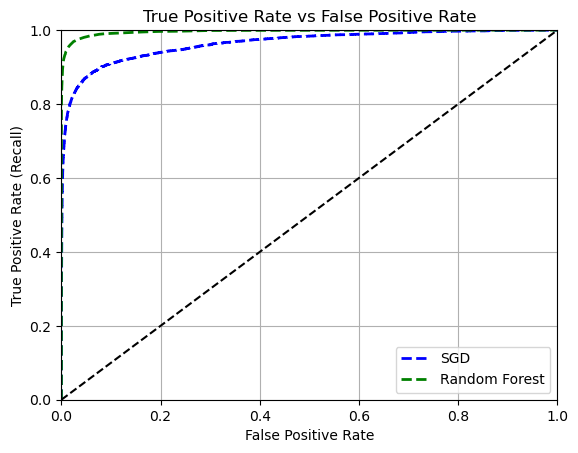

In [106]:
plt.plot(fpr, tpr, "b--", linewidth=2, label="SGD")
plt.plot(fpr_forest, tpr_forest, "g--", linewidth=2, label = "Random Forest")
plt.plot([0, 1], [0, 1], 'k--') # Dashed diagonal
plt.legend(loc="lower right")
plt.title("True Positive Rate vs False Positive Rate")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate (Recall)")
plt.grid()
plt.xlim(0, 1)
plt.ylim(0, 1)
plt.show()

In [100]:
roc_auc_score(y_train_3, y_scores_forest)

0.9961825346015486